In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [ ]:
DATA_PATH = '../../data'

In [2]:
df = pd.read_parquet(f'{DATA_PATH}/raw/data.pqt')
# remove rows where memo is the same as category_description
df = df[df["memo_clean"] != df["category_description"]]
df.head()

,prism_consumer_id,prism_account_id,memo_clean,amount,category_description
0,0,acc_0,Kroger,20.98,GROCERIES
1,0,acc_0,CASH APP*FREE XXXXXXXXXX CA XX/XX,200.00,GENERAL_MERCHANDISE
7,0,acc_0,Amazon.com*HXXXWXXQX Amzn.com/bill WA XX/XX,33.20,GENERAL_MERCHANDISE
9,0,acc_0,Amazon,42.79,GENERAL_MERCHANDISE
10,0,acc_0,Kroger,36.55,GROCERIES


In [3]:
SEED = 70835

train = df.sample(frac=0.8, random_state=SEED)
test = df.drop(train.index)

In [4]:
train.shape, test.shape

((1026997, 5), (256749, 5))

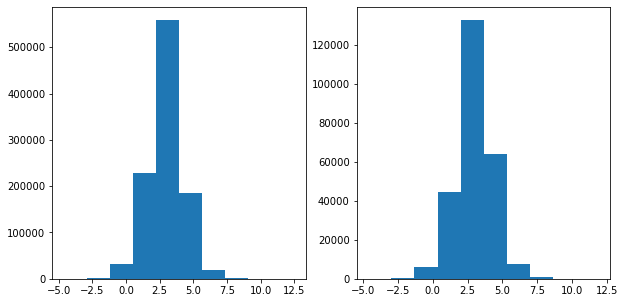

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].hist(np.log(train[train["amount"] != 0]["amount"]))
ax[1].hist(np.log(test[test["amount"] != 0]["amount"]));

/var/folders/0_/tww2_mb540ldlyk4js_q8l8r0000gn/T/ipykernel_772/567620628.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(train_cat_count.index, rotation=90)
/var/folders/0_/tww2_mb540ldlyk4js_q8l8r0000gn/T/ipykernel_772/567620628.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(test_cat_count.index, rotation=90);


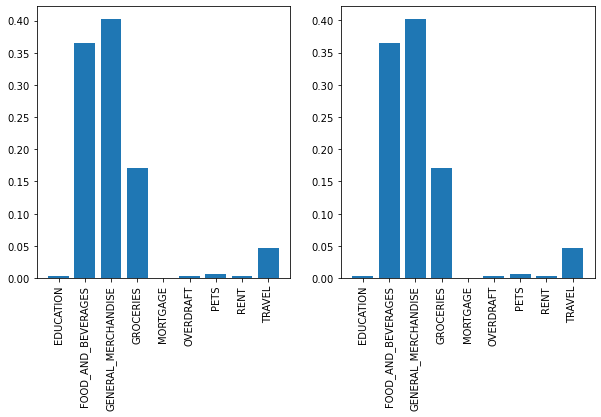

In [6]:
train_cat_count = train.groupby("category_description").count()["amount"] / train.shape[0]
test_cat_count = test.groupby("category_description").count()["amount"] / test.shape[0]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].bar(train_cat_count.index, train_cat_count)
ax[0].set_xticklabels(train_cat_count.index, rotation=90)
ax[1].bar(test_cat_count.index, test_cat_count)
ax[1].set_xticklabels(test_cat_count.index, rotation=90);